#### **1) INTRODUCTION:**
* This is my capstone project for the google data analytics                  professional certificate course in coursera. 
* Here i am given a fictional  cyclistic bikeshare company, but the data is the replica of a very similar real world comapany though the data is not accurate due to privacy policy issues.
* I am going to follow the analysis steps which i was learned in this course. 
* The 6 step analysis process are;
    + Ask
    + Prepare
    + Process
    + Analyse
    + Share
    + Act


#### **2) ASK:**
    
+ **Buisness Task:**
    - As per the financial analyst team increasing the membership riders        will be best for the future growth  of our company rather than            increasing the  casual riders 
    - So  the main objective of this analysis is to help the maeketing team       to come up with a marketing strategy for converting the casual riders       into an annual membership riders
+ **Key stakeholders:**
    - Cyclistic Riders
    - Lily moreno- marketing director and manager
    - Cyclistic marketing team
    - Cyclistic executive team
+ **Deliverable:**
    - My task is to identify  how the casual riders are different from           membership riders

<br>

#### **3) PREPARE AND PROCESS :** 

I am doing the prepare and process phase of this analysis simultaneously together. Because either way as i move on ,i will overlap these two phases so to avoid any further confusions i am doing it together.

* **Data source:**
    + The data i am using in this analysis is downloaded from this [tripdata webiste](https://divvy-tripdata.s3.amazonaws.com/index.html)

* **Data stored format:**
    +  The data was stored in the csv(comma separated values) format.

* **Data filtered:**
    + I am using the last 12 months data from Jan 2022 - Dec 2022
  
* **Data integrity and credibility(**ROCCC**):**
    + The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).
    +  The data is not completely ROCCC because we are using the proxy data for this fictional company but it is almost ROCCC, it is                   **reliable**, since it is **proxy** it is similar to **original** ,        **not comphrehensive** but it is **enough** to make our analysis, it       is **current** and it is **cited** 

* **Data limitations:**
    + This is public data that we can use to explore how different customer   types are using Cyclistic bikes. 
    + But note that data-privacy issues prohibit us from using riders’           personally identifiable information.  
    + so i won’t be able to connect pass purchases to credit card numbers        to determine if casual riders live in the Cyclistic service area or        if they have purchased multiple single passes.
* **Tools used:**
    + I am using R programming for this analysis as it is more efficient         and statistically friendly tool to do our anlaysis.

##### **a) DATA ACQUISTION :**
* Installing and loading the required packages for doing the data            cleaning,   data manipulation , data analysis and data visualization.


In [62]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
library(lubridate)
library(readr)
library(readxl)
library(dplyr)
library(ggplot2)
install.packages("janitor")
library(janitor)
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##### **b) IMPORTING THE FILES:**

* Now i  want to access the package, so i am  using the read_csv
 function from read_r to import it we can also use the files tab in 4th     pane to import it and  in some cases we  can also use read_xl for excel    files.

In [64]:
Jan_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202201-divvy-tripdata.csv")
Feb_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202202-divvy-tripdata.csv")
Mar_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202203-divvy-tripdata.csv")
Apr_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202204-divvy-tripdata.csv")
May_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202205-divvy-tripdata.csv")
Jun_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202206-divvy-tripdata.csv")
Jul_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202207-divvy-tripdata.csv")
Aug_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202208-divvy-tripdata.csv")
Sep_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202209-divvy-publictripdata.csv")
Oct_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202210-divvy-tripdata.csv")
Nov_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202211-divvy-tripdata.csv")
Dec_2022 = read_csv("/kaggle/input/cyclstic-bikeshare-data-jan2022-ec2022/202212-divvy-tripdata.csv")

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

##### **c) CHECKING THE CONSISTENCY OF THE FILES:**
 * Now we want to combine all the files into a single dataset for             processing the data for analysis. Before combining we want  to ensure      that the data is consistent and clean .

 *  Here i am using colnames() function to make sure the coulumn names are     same through all the files.

In [65]:

colnames(Jan_2022) == colnames(Feb_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [66]:
colnames(Feb_2022) == colnames(Mar_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [67]:
colnames(Mar_2022) == colnames(Apr_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [68]:
colnames(Apr_2022) == colnames(May_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [69]:
colnames(May_2022) == colnames(Jun_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [70]:

colnames(Jun_2022) == colnames(Jul_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [71]:

colnames(Jul_2022) == colnames(Aug_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [72]:

colnames(Aug_2022) == colnames(Sep_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [73]:
colnames(Sep_2022) == colnames(Oct_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [74]:
colnames(Oct_2022) == colnames(Nov_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [75]:

colnames(Nov_2022) == colnames(Dec_2022)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

##### **d) ENSURING THE FILES IS BINDABLE TOGETHER:**

* As Column names are consistent , now we have to bind the data , as the     data elements or observations  we need to access are in rows before        binding we have to ensure or  inspect the rows data format is consistent   or not .


In [76]:
compare_df_cols_same(Jan_2022,Feb_2022,Mar_2022,Apr_2022,May_2022,Jun_2022,Jul_2022,Aug_2022,Sep_2022,
                     Oct_2022,Nov_2022,Dec_2022, bind_method = c("bind_rows","rbind"), verbose = TRUE )

[1] TRUE

##### **e) COMBINING THE MONTHLY FILES INTO ANNUAL DATA:**

* As the Above result is true now we can bind the rows together .
combining the monthly datasets into a single annual dataset

In [77]:
trip_2022 = bind_rows(Jan_2022,Feb_2022,Mar_2022,Apr_2022,May_2022,Jun_2022,Jul_2022,Aug_2022,
                      Sep_2022,Oct_2022,Nov_2022,Dec_2022)

##### **f) DATA WRANGLING AND DATA CLEANING:**
* **structure of dataset:**
    + Now i Have to process the data by data wrangling so to proceed with        we have to know the structure or Format of the dataset, How the data       elements are stored in it. By using he str we can get the detailed         preview of the dataset.


In [78]:
str(trip_2022)

spc_tbl_ [5,667,717 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5667717] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:5667717] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5667717], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:5667717], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5667717] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5667717] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5667717] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5667717] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5

* **Formatting or transforming the data:**
    + After going through the structure of the dataset first thing i have        to get the date, month, year, day, and day of the week in order to         make the analysis efficiently.

    + Before doing that i am **dropping the null** values in dataset

In [79]:
trip_2022 = drop_na(trip_2022)

In [80]:
trip_2022$date = as.Date(trip_2022$started_at)
trip_2022$month = format(trip_2022$date,"%m")
trip_2022$year = format(trip_2022$date,"%Y")
trip_2022$day = format(trip_2022$date,"%d")
trip_2022$day_of_week =format(trip_2022$date, "%A")

* **Viewing:**
* To ensure that everything goes well lets view the data.

In [81]:
head(trip_2022)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,01,2022,13,Thursday
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,01,2022,10,Monday
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,01,2022,25,Tuesday
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,01,2022,04,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,01,2022,20,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,01,2022,11,Tuesday


* **Calculating the ride distance and duration:**

    + Now we want to calculate the **ride duration**.

In [82]:
trip_2022$ride_duration =difftime(trip_2022$ended_at,trip_2022$started_at)

* Lets check how it is stored 

In [83]:
str(trip_2022$ride_duration)

 'difftime' num [1:4369360] 177 261 261 896 ...
 - attr(*, "units")= chr "secs"


* To perform calculations we need to **convert into numeric**

In [84]:
trip_2022$ride_duration = as.numeric(trip_2022$ride_duration)

is.numeric((trip_2022$ride_duration))

[1] TRUE

* Now we want to calculate the  **ride distance.** 

In [85]:
install.packages("geosphere")
library(geosphere)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [86]:
trip_2022$ride_distance =                                         distGeo(matrix(c(trip_2022$start_lng,trip_2022$start_lat), 
                                       ncol = 2)  ,
 matrix(c(trip_2022$end_lng,trip_2022$end_lat),ncol = 2))

* I often use View function to view the data  when i get  confused with      previewing the structure of the data but here i did'nt include the code    chunks
* **Unit conversion:**
    + Now i need to see the distance in km which was in metre
      and duration in minutes which was in seconds

In [87]:
trip_2022$ride_distance =trip_2022$ride_distance/1000
trip_2022$ride_duration =trip_2022$ride_duration/60

* **Filtering the data:**
    + Now i need to drop the rows containing ride duration and ride              distance which are <= 0.This happened because there was no data with       respect to the location(name & coordinates) and time.

In [88]:
 trip_2022_clean1 = trip_2022[ !(trip_2022$ride_duration <= 0 | trip_2022$ride_distance <= 0),]  

* **Previewing:**
    + Here i am going to view the dataset and structure of the dataset

In [89]:
head(trip_2022_clean1)
str(trip_2022_clean1)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,year,day,day_of_week,ride_duration,ride_distance
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,01,2022,13,Thursday,2.950000,0.7013791
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,01,2022,10,Monday,4.350000,0.6961414
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,01,2022,25,Tuesday,4.350000,1.0034507
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,01,2022,04,Tuesday,14.933333,2.4601250
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,01,2022,20,Thursday,6.033333,0.8140730
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,01,2022,11,Tuesday,3.366667,0.8456658


tibble [4,168,269 × 20] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4168269] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:4168269] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4168269], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:4168269], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:4168269] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:4168269] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:4168269] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:4168269] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:4168269] 42 42 

#### **4) ANALYZE AND SHARE:**

<br>

##### **a) SUMMARY OF THE DATA:**

* Now we have to analyze the processed data.

In [90]:
trip_2022_clean1 %>% 
  group_by(member_casual) %>% 
  summarise( average_ride_duration = mean(ride_duration),median_ride_duration = median(ride_duration),
            max_ride_duration = max(ride_duration), min_ride_duration = min(ride_duration) )

member_casual,average_ride_duration,median_ride_duration,max_ride_duration,min_ride_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,22.70726,13.63333,34354.067,0.01666667
member,12.35788,9.00000,1493.233,0.01666667


##### **b) Total Rides Made By Casual And Member:**

In [91]:
trip_2022_clean1 %>% 
  group_by(member_casual) %>% 
  summarise(ride_count = n(),.groups = "drop")

member_casual,ride_count
<chr>,<int>
casual,1634385
member,2533884


##### * **Visualization of the total ride count of members and casual:**

In [92]:
trip_2022_visual =trip_2022_clean1 %>% 
  group_by(member_casual) %>% 
  summarise(no_of_rides = n())

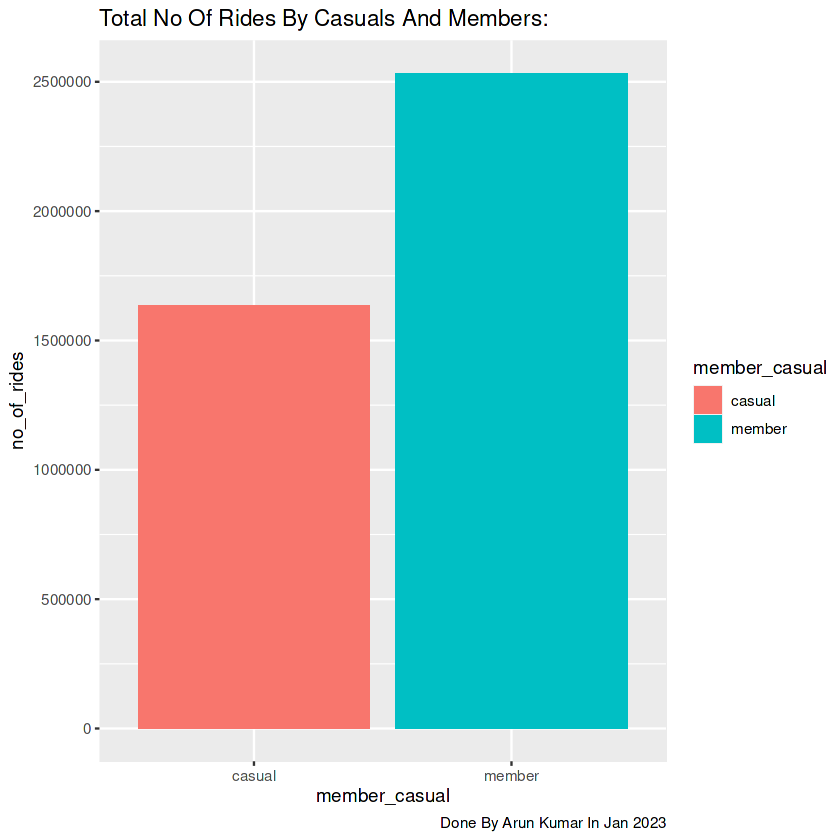

In [93]:
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes(x =  member_casual,y = no_of_rides, fill = member_casual ),position = "dodge")+
  labs( title= "Total No Of Rides By Casuals And Members:",caption = 
         "Done By Arun Kumar In Jan 2023")

##### **c)  No Of Rides By Casuals And Members In Each Day Of The Week:** 

    +  **Ordering  The Day Of The Week:**
    

In [94]:
trip_2022_clean1$day_of_week = ordered(trip_2022_clean1$day_of_week,levels = c("Sunday","Monday","Tuesday",
                                                            "Wednesday","Thursday","Friday","Saturday"))

In [95]:
trip_2022_clean1 %>% 
  group_by(member_casual,day_of_week) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual,day_of_week)

member_casual,day_of_week,no_of_rides
<chr>,<ord>,<int>
casual,Sunday,276075
casual,Monday,194134
casual,Tuesday,183746
casual,Wednesday,191020
casual,Thursday,215621
casual,Friday,233140
casual,Saturday,340649
member,Sunday,286440
member,Monday,363954


##### **Visualization Of The Total Ride Count Of Members And Casual In             Each Day Of The Week:**

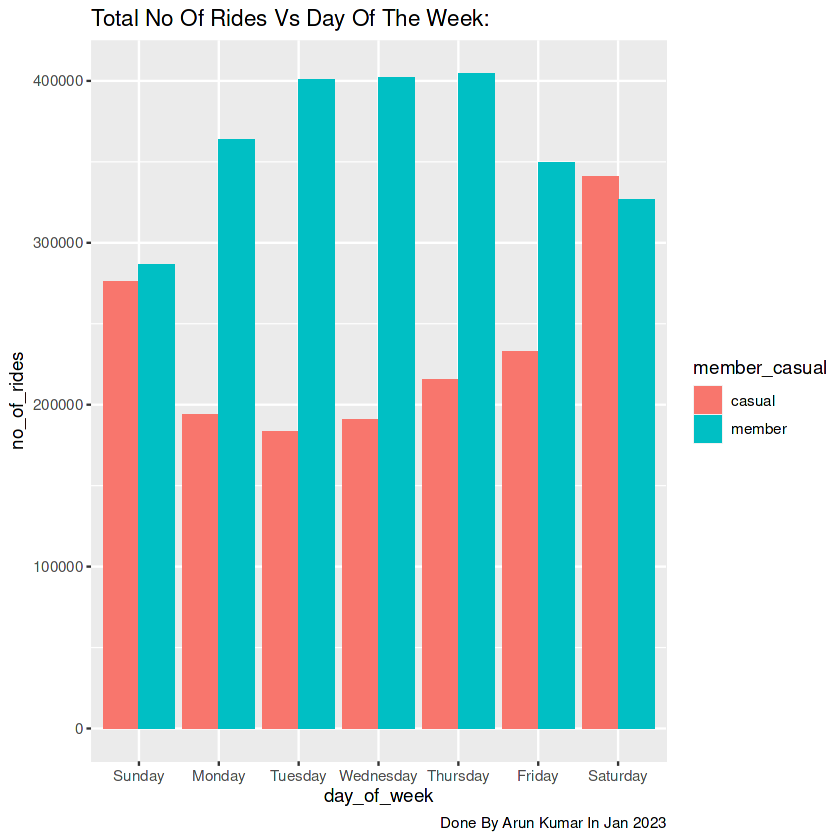

In [96]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,day_of_week) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual,day_of_week)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes( x = day_of_week, y = no_of_rides, fill =  member_casual),position = "dodge")+
  labs(title ="Total No Of Rides Vs Day Of The Week:",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x,scientific = FALSE))
  

##### **d) Total Ride Count Of Members And Casuals In Each Month:**

In [97]:
trip_2022_clean1 %>% 
  group_by(member_casual,month) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual,month)

member_casual,month,no_of_rides
<chr>,<chr>,<int>
casual,01,11805
casual,02,14071
casual,03,61216
casual,04,84422
casual,05,200555
casual,06,269367
casual,07,289042
casual,08,252494
casual,09,208265



##### **Visualization Of The Total Ride Count Of Members And Casual In             Each Month:**

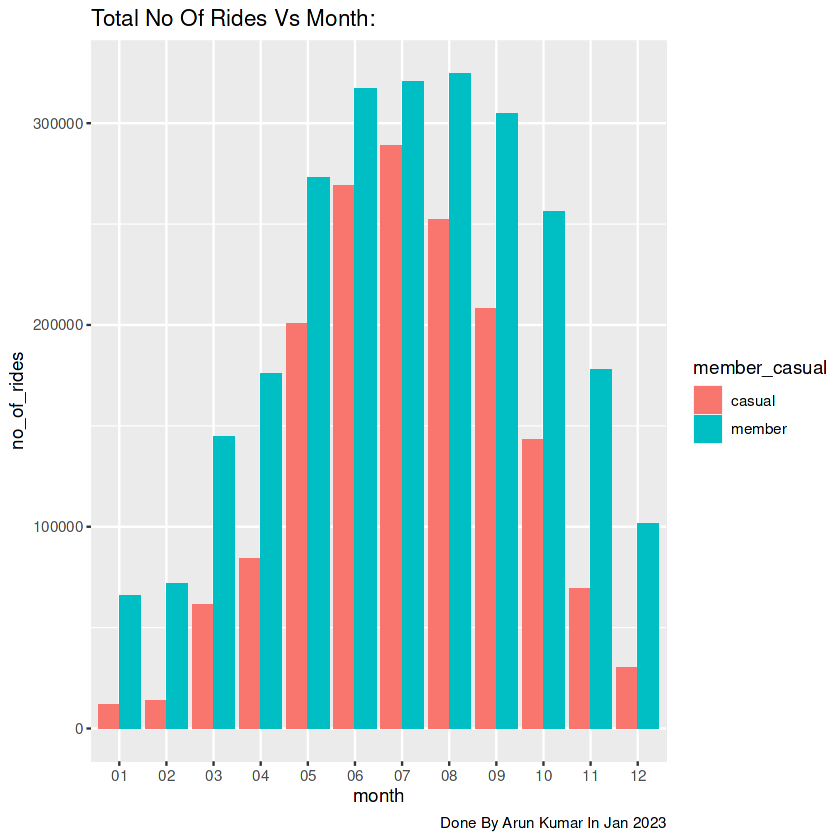

In [98]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual, month) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual, month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes( x = month, y = no_of_rides, fill =  member_casual),position = "dodge")+
  labs(title = "Total No Of Rides Vs Month:",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x,scientific = FALSE))

##### **e) Average Ride Duration  Of Members And Casual In Each                       Day Of The Week:**

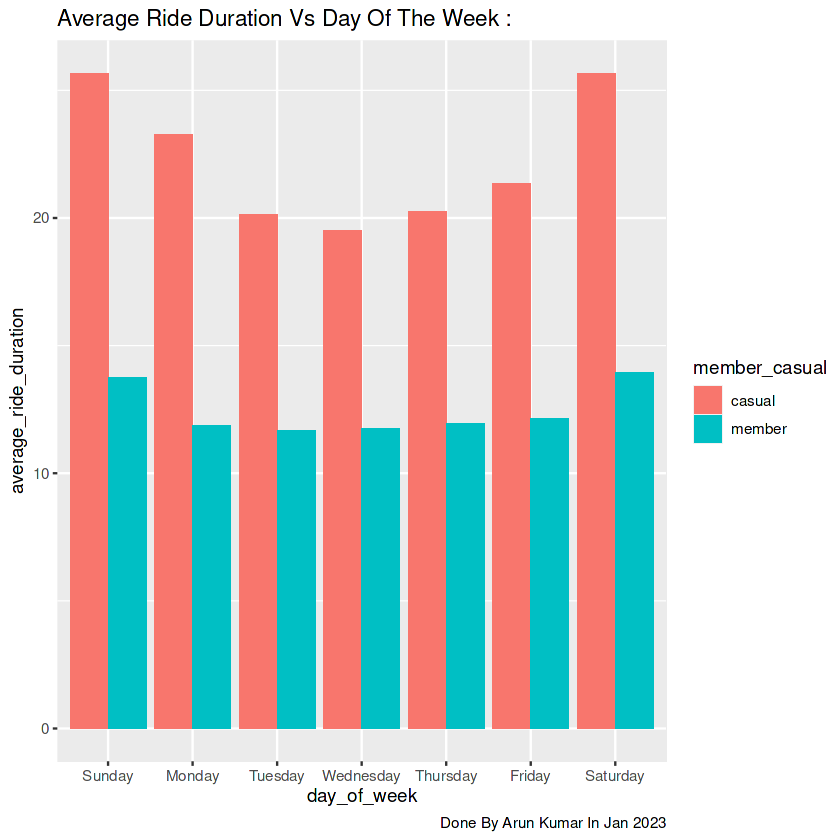

In [99]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,day_of_week) %>% 
  summarise(average_ride_duration = mean(ride_duration),.groups = "drop")%>% 
  arrange(member_casual,day_of_week)
ggplot(data = trip_2022_visual)+
  geom_col(mapping= aes(x= day_of_week , y = average_ride_duration, fill = member_casual),position = "dodge")+
  labs(title = "Average Ride Duration Vs Day Of The Week : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **f) Average Ride Duration  Of Members And Casual In Each                       Month:**

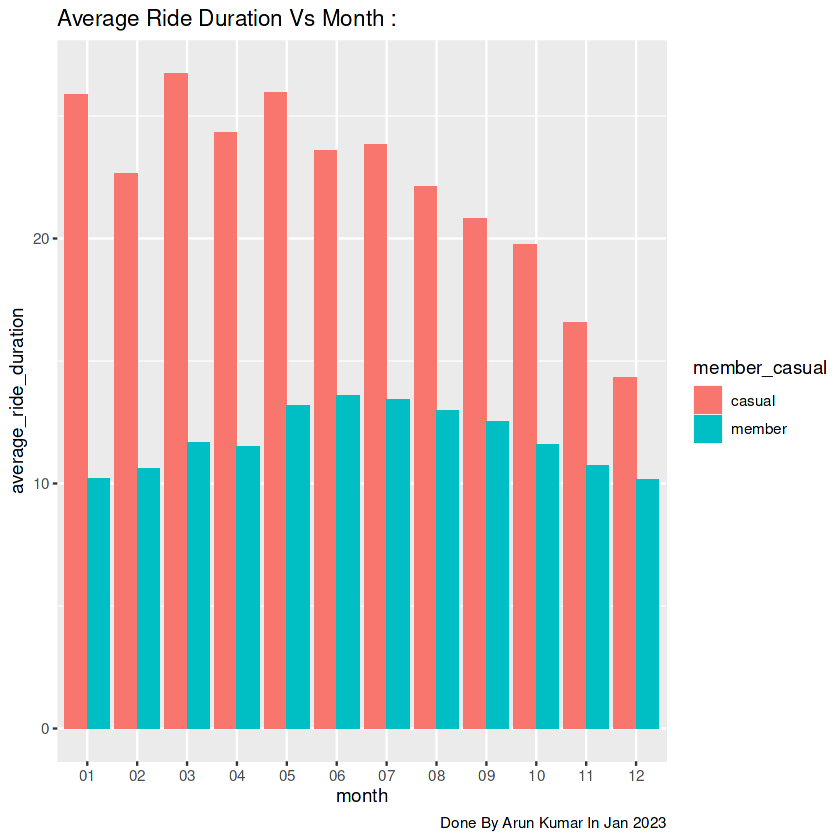

In [100]:
 trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,month) %>% 
  summarise(average_ride_duration = mean(ride_duration),.groups = "drop")%>% 
  arrange(member_casual, month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping= aes(x=  month , y = average_ride_duration, fill = member_casual),position = "dodge")+
  labs(title = "Average Ride Duration Vs Month : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **g) Average Ride  distance Of Members And Casual In Each                       Month:**

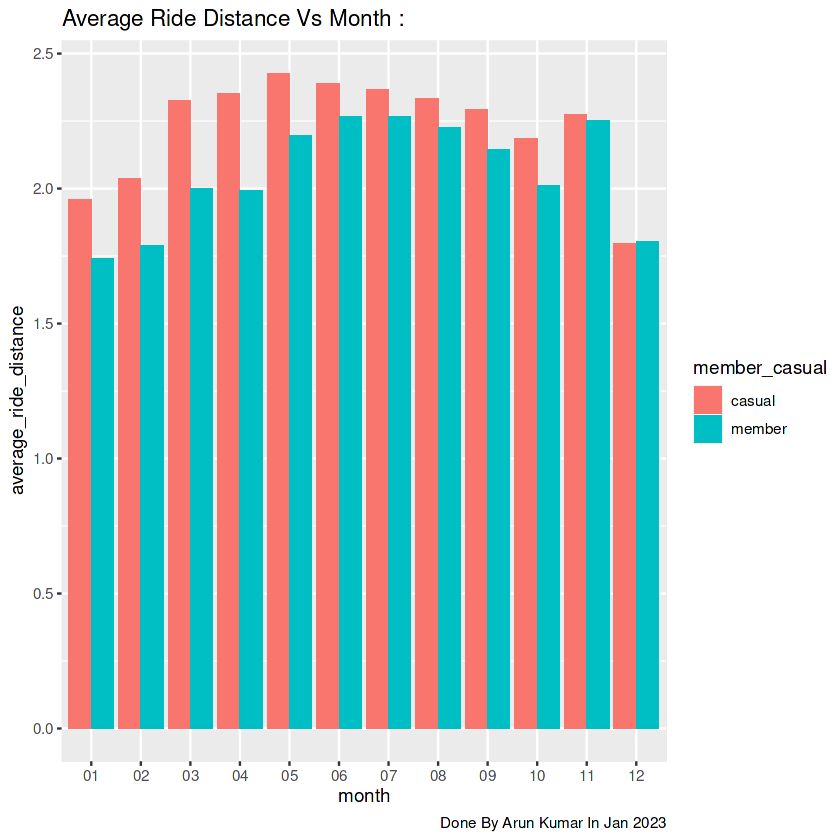

In [101]:
 trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,month) %>% 
  summarise(average_ride_distance = mean(ride_distance),.groups = "drop")%>% 
  arrange(member_casual, month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping= aes(x=  month , y = average_ride_distance, fill = member_casual),position = "dodge")+
  labs(title = "Average Ride Distance Vs Month : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **h) Average Ride  distance Of Members And Casual In Each                       Day Of The Week:**

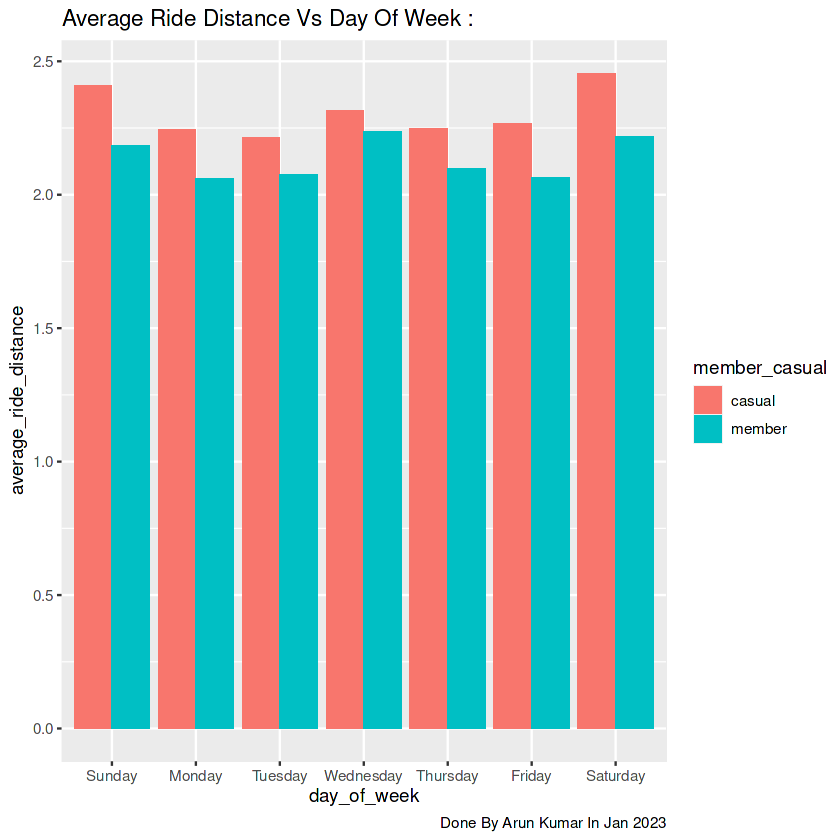

In [102]:
 trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(average_ride_distance = mean(ride_distance),.groups = "drop")%>% 
  arrange(member_casual,  day_of_week)
ggplot(data = trip_2022_visual)+
  geom_col(mapping= aes(x=  day_of_week, y = average_ride_distance, fill = member_casual),position = "dodge")+
  labs(title = "Average Ride Distance Vs Day Of Week : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **i)Total Number Of Rides By Members And Casual In Each Hour Of The            Day:**

In [103]:
trip_2022_clean1$hour = hour(trip_2022_clean1$started_at)

Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


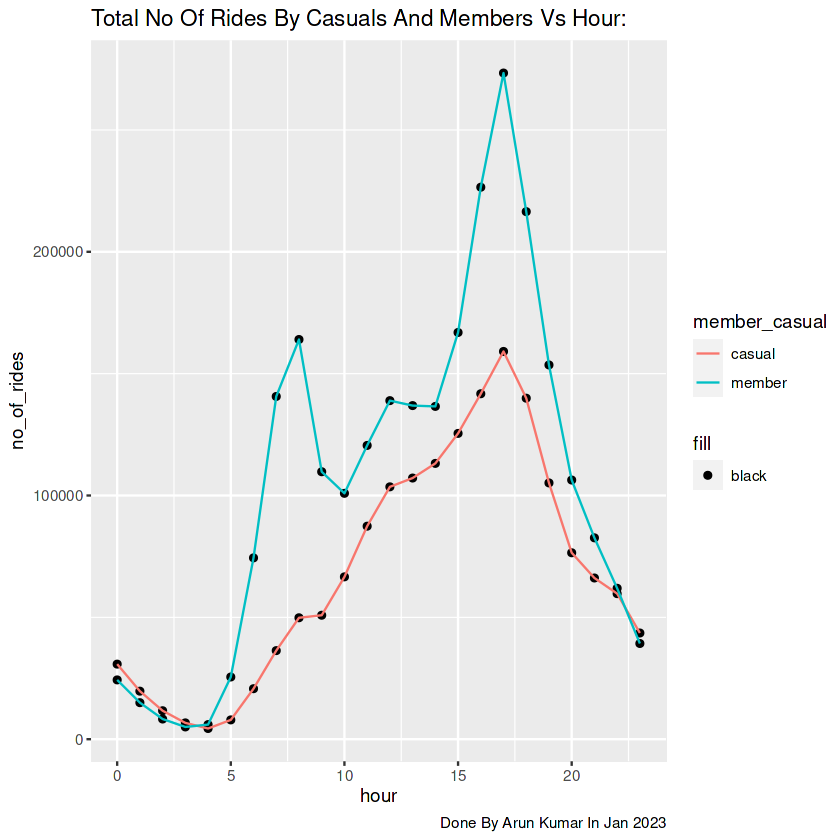

In [104]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,hour) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual,hour)
ggplot(data = trip_2022_visual)+
  geom_point(mapping =  aes(x = hour ,y = no_of_rides,  fill = "black"),position = "dodge")+
  geom_line(mapping =  aes(x = hour ,y = no_of_rides,color = member_casual),position = "dodge")+
  labs(title = "Total No Of Rides By Casuals And Members Vs Hour:",caption = 
         "Done By Arun Kumar In Jan 2023")+   
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **j) Mean Ride Distance In Each Hour Of The Day:**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


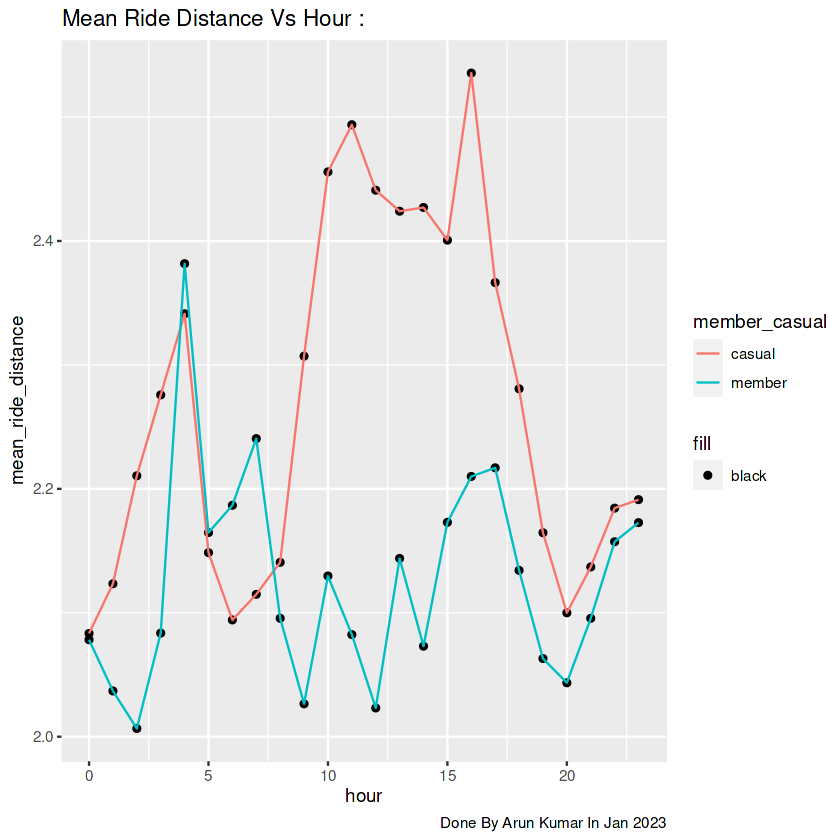

In [105]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,hour) %>% 
  summarise(mean_ride_distance =  mean(ride_distance)) %>% 
  arrange(member_casual,hour)
ggplot(data = trip_2022_visual)+
  geom_point(mapping = aes(x = hour  , y  = mean_ride_distance, fill = "black"),position = "dodge")+
  geom_line(mapping = aes(x = hour , y = mean_ride_distance , color = member_casual),position = "dodge")+
  labs(title = "Mean Ride Distance Vs Hour : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **k) Mean Ride Duration In Each Hour Of The Day:**

Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


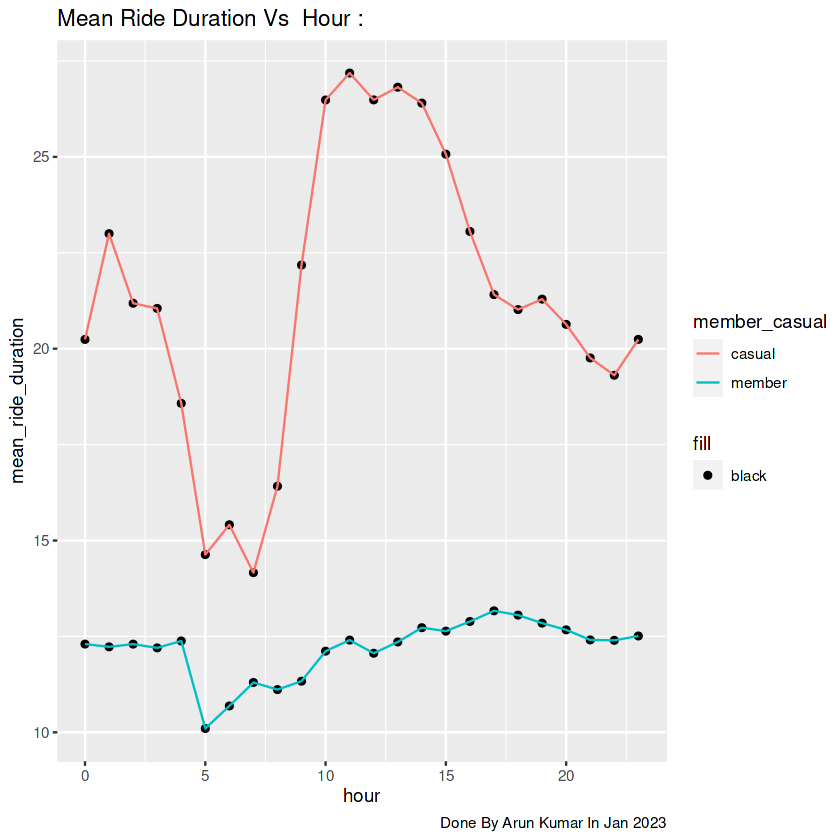

In [106]:
 trip_2022_visual = trip_2022_clean1 %>%  
 group_by(member_casual,hour) %>% 
  summarise(mean_ride_duration = mean(ride_duration),.groups = "drop") %>% 
  arrange(member_casual,hour)
ggplot(data = trip_2022_visual)+
  geom_point(mapping = aes(x = hour  , y  = mean_ride_duration, fill = "black"),position = "dodge")+
  geom_line(mapping = aes(x = hour , y = mean_ride_duration , color = member_casual),position = "dodge")+
  labs(title = "Mean Ride Duration Vs  Hour : ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **l)Total Number Of Rides By Members And Casual In Each Type of                Bike:**

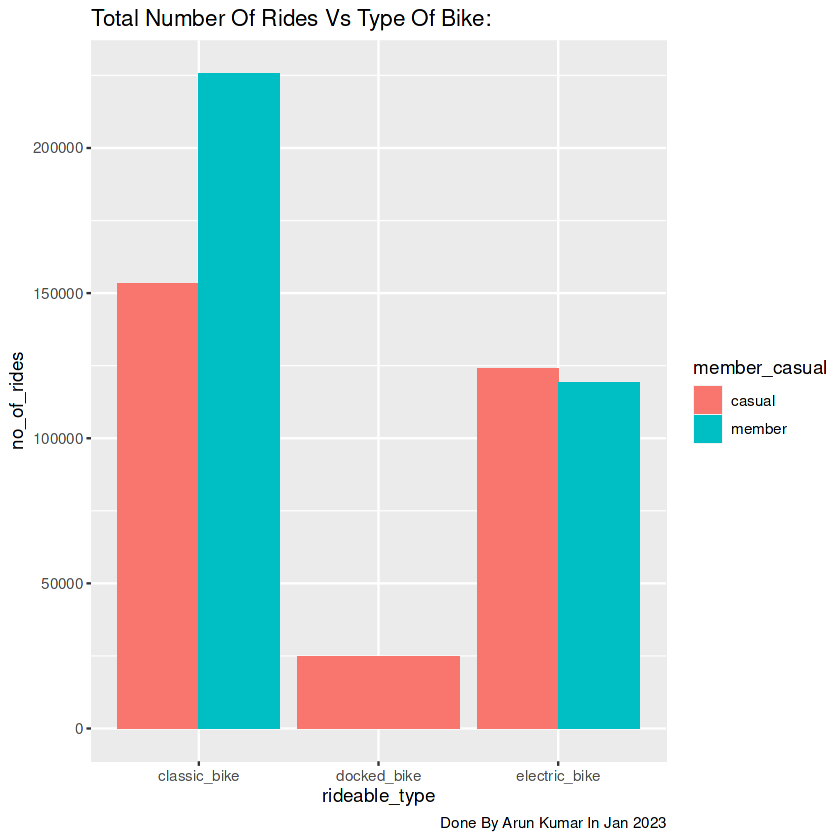

In [107]:
trip_2022_visual =  trip_2022_clean1 %>% 
  group_by(member_casual,rideable_type,month) %>% 
  summarise(no_of_rides = n(),.groups = "drop") %>% 
  arrange(member_casual,month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes(x = rideable_type , y = no_of_rides, fill = member_casual),position = "dodge")+
  labs(title = "Total Number Of Rides Vs Type Of Bike:",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **m) Mean Ride Distance Of Each Type of Bike By Casuals And Member:**

`summarise()` has grouped output by 'member_casual', 'rideable_type'. You can
override using the `.groups` argument.


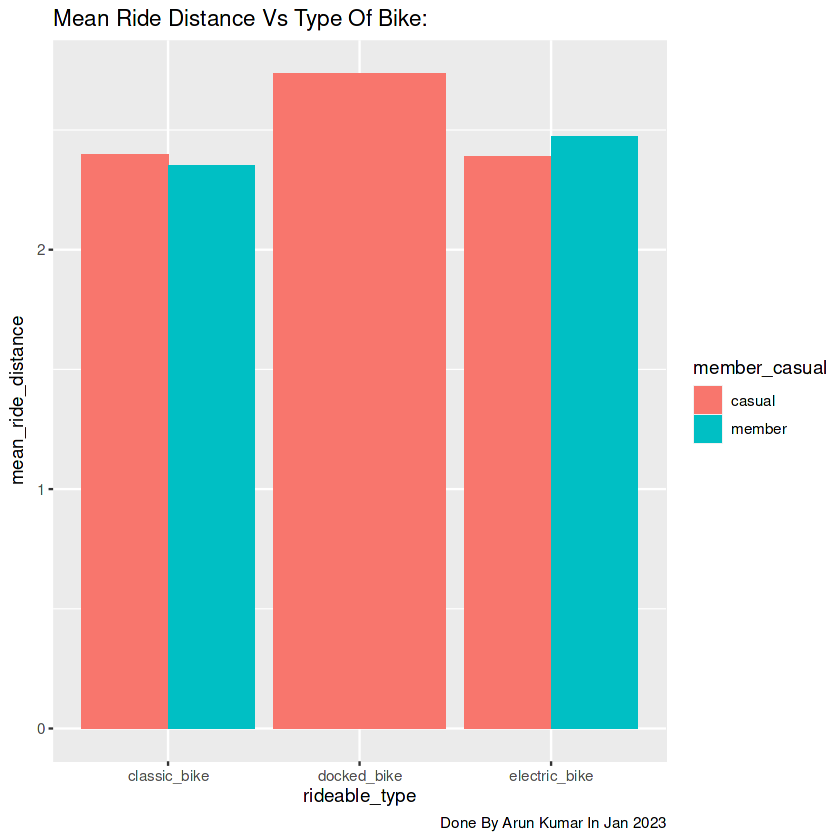

In [108]:
trip_2022_visual =  trip_2022_clean1 %>% 
  group_by(member_casual,rideable_type,month) %>% 
  summarise(mean_ride_distance =  mean(ride_distance)) %>% 
  arrange(member_casual,month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes(x = rideable_type , y = mean_ride_distance, fill = member_casual),position = "dodge")+
  labs(title = "Mean Ride Distance Vs Type Of Bike:",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **n) Mean Ride Duration Of Each Type of Bike By Casuals And Member:**

`summarise()` has grouped output by 'member_casual', 'rideable_type'. You can
override using the `.groups` argument.


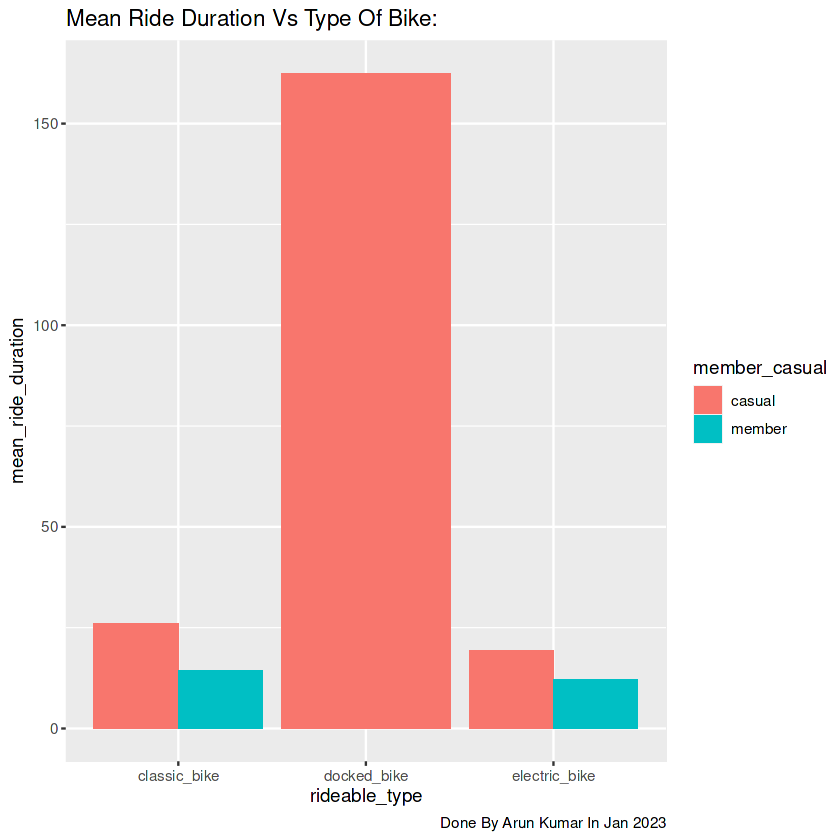

In [109]:
trip_2022_visual =  trip_2022_clean1 %>% 
  group_by(member_casual,rideable_type,month) %>% 
  summarise(mean_ride_duration =  mean(ride_duration)) %>% 
  arrange(member_casual,month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes(x = rideable_type, y = mean_ride_duration, fill = member_casual),position = "dodge")+
  labs(title = "Mean Ride Duration Vs Type Of Bike:",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **o) Total Number Of Rides By Each Type Of Bike In Each Month By                Casuals And Members:**

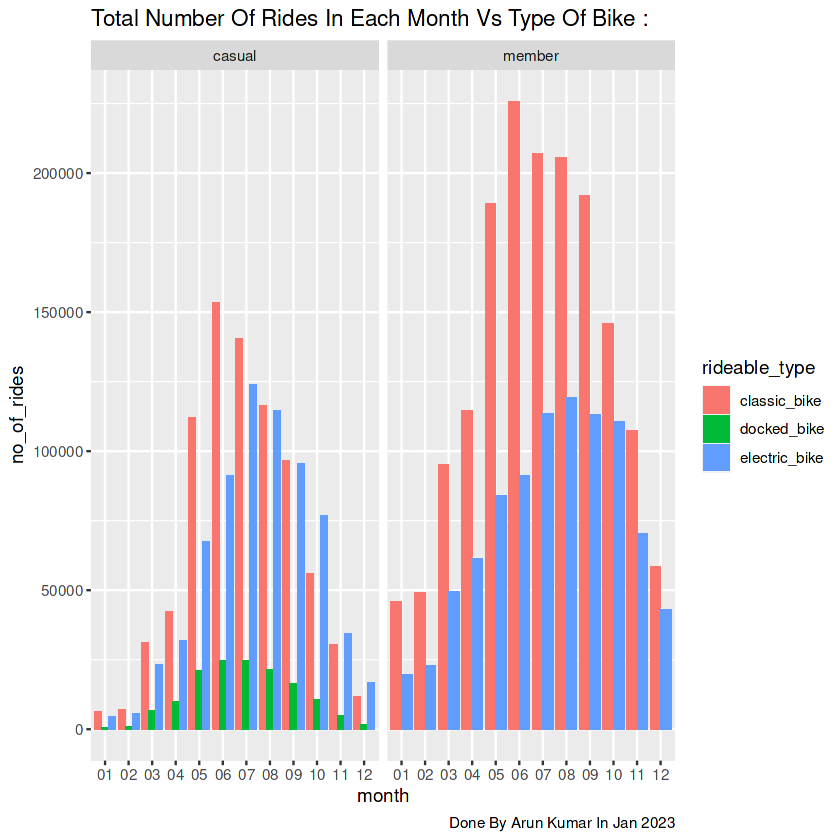

In [110]:
trip_2022_visual =  trip_2022_clean1 %>% 
  group_by(member_casual,rideable_type,month) %>% 
  summarise(no_of_rides  = n(),.groups = "drop") %>% 
  arrange(member_casual,month)
ggplot(data = trip_2022_visual)+
  geom_col(mapping = aes(x = month, y = no_of_rides , fill = rideable_type ),position = "dodge")+
  facet_wrap(~member_casual)+
  labs(title = "Total Number Of Rides In Each Month Vs Type Of Bike :",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

##### **p) Total Number Of Rides By Each Type Of Bike In Each Hour Of The             Day By Casuals And Members:**

Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


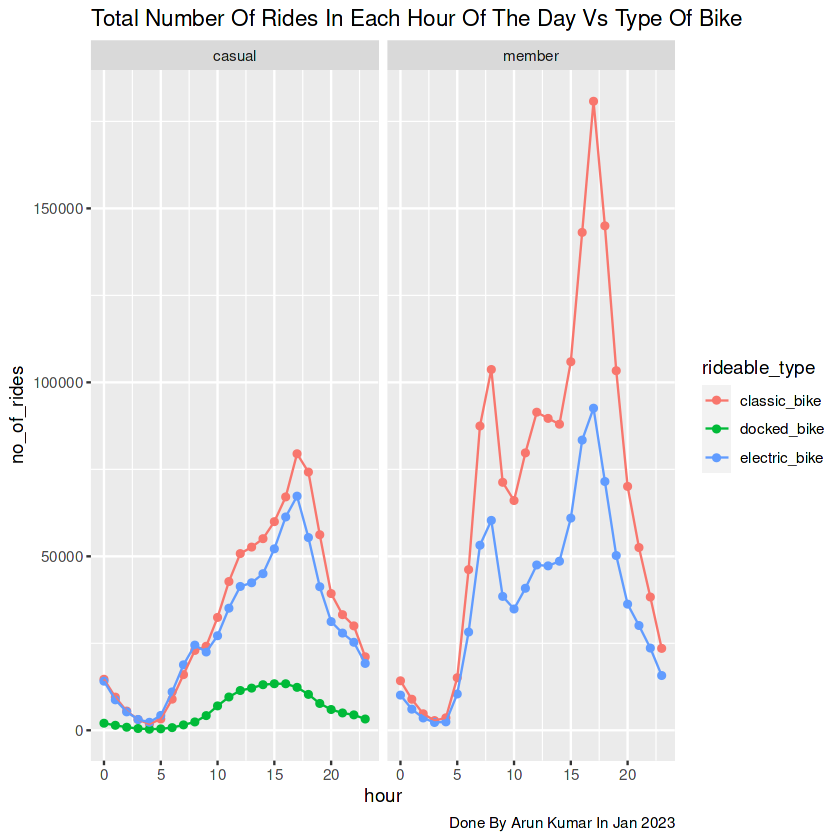

In [111]:
trip_2022_visual = trip_2022_clean1 %>% 
  group_by(member_casual,rideable_type,hour) %>% 
  summarise( no_of_rides= n(),.groups = "drop") %>% 
  arrange(member_casual,rideable_type,hour)
ggplot(data = trip_2022_visual)+
  geom_point(mapping = aes(x = hour , y = no_of_rides , color =  rideable_type),position = "dodge")+
  geom_line(mapping = aes(x = hour , y = no_of_rides , color =  rideable_type),position = "dodge" )+
  facet_wrap(~ member_casual)+
  labs(title = "Total Number Of Rides In Each Hour Of The Day Vs Type Of Bike ",caption = 
         "Done By Arun Kumar In Jan 2023")+
  scale_y_continuous(labels = function(x)format(x, scientific = FALSE))

##### **5) ACT :**

<br>

* **FINDINGS OF MY ANALYSIS:**
    + Members Ride More No Of Times Than Casuals .
    + Mean  Ride Distance Was Almost Same For Both Casuals And Members
    + Mean Ride Duration Of Casuals Was More Than The Members.
    + In Weekdays Members Ride More Than The Casuals And In Weekends Almost
      Both Are Same.
    + Casuals And Members Rides More In Summer Season Which Is Late April        To Late October And There Was Hardly No Rides In Winter By Casuals         And Members.
    + When It Comes To Spring And Fall There Was An Fair Not Of Rides By         Members But Casuals Rides Significantly Lesser No Of Rides In Late         Fall And Early Spring.
    + Docked Bikes Are Only Used By Casuals Not By Members.
    + Casuals Have Higher Mean Ride Distance  And Mean Ride Duration Than        members especially in Morning 10.00 To 11.00 Am And  Evening 5.00 To       6.00 Pm.
    + Members Have Higher Frequency Of Rides In Every Hour Of The Day  Than       Casuals.
    + Number Of Rides By Members Around Morning 8.00 Am And  Around Evening       5.00 Pm  Was At The Peak.

* **RECOMENDATIONS:**
    + As Casuals Are Riding Good No Of Rides In Weekends We Can Give The         Weekend Offers For Membership. So They Can Buy Membership For Their        Benefits.
    + As Casuals Are Riding Significant No Of Rides , Higher Mean Ride D         Distance And Higher Mean Ride Duration Between 7.30 Am To 5.00 Pm.
      So For Membership We Can Give Cashback Points And Other Benefits           Like Peak Hour Offer For Riding Between 8.00 Am To 5.00 Pm So That         They Can Make Use Of It .
    + We Can Give Welcome Offer In Summer As Casuals And Members Giving          Head To Head Fight.
    + We Can Give Additional Discount For Docked Bikes For Membership            Because Docked Bikes Are Only Used By Casuals So They Can Make Use Of       It.
    + **Note:** 
        + Offers Can Be Cash Discount , Redeem Points For Using them                 next time for Our Bikes And Also Fitness Friendly Gifts.